<a href="https://colab.research.google.com/github/tefarov/netology_pyda5/blob/master/abd_06_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка PySpark

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz

In [0]:
!tar -xvf spark-2.4.4-bin-hadoop2.7.tgz

spark-2.4.4-bin-hadoop2.7/
spark-2.4.4-bin-hadoop2.7/R/
spark-2.4.4-bin-hadoop2.7/R/lib/
spark-2.4.4-bin-hadoop2.7/R/lib/sparkr.zip
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/INDEX
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/R.css
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/00Index.html
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/aliases.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/AnIndex
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdx
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdb
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/paths.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/worker.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/daemon.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/te

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

# Введение
Скачайте dataset iris [https://gist.github.com/netj/8836201]

In [0]:
df = spark.read.csv('/content/iris.csv', inferSchema=True, header=True)
df = df.withColumnRenamed('sepal.length','sep_len')
df = df.withColumnRenamed('sepal.width','sep_wid')
df = df.withColumnRenamed('petal.length','pet_len')
df = df.withColumnRenamed('petal.width','pet_wid')

# Задание 1
Для каждого типа цветка определите максимальное, минимальное и среднее значение 4-х параметров

In [0]:
df_grp = df.groupBy('variety')

print('Таблица минимальных значений')
df_min = df_grp.min('sep_len','sep_wid','pet_len','pet_wid')
print(df_min.show())

print('Таблица средних значений')
df_avg = df_grp.avg('sep_len','sep_wid','pet_len','pet_wid')
print(df_avg.show())

print('Таблица максимальных значений')
df_max = df_grp.max('sep_len','sep_wid','pet_len','pet_wid')
print(df_max.show())

Таблица минимальных значений
+----------+------------+------------+------------+------------+
|   variety|min(sep_len)|min(sep_wid)|min(pet_len)|min(pet_wid)|
+----------+------------+------------+------------+------------+
| Virginica|         4.9|         2.2|         4.5|         1.4|
|    Setosa|         4.3|         2.3|         1.0|         0.1|
|Versicolor|         4.9|         2.0|         3.0|         1.0|
+----------+------------+------------+------------+------------+

None
Таблица средних значений
+----------+-----------------+------------------+------------------+------------------+
|   variety|     avg(sep_len)|      avg(sep_wid)|      avg(pet_len)|      avg(pet_wid)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000

# Задание 2
Визуализируйте точечный график (plt.scatter) по каждой паре параметров

In [0]:
import matplotlib.pyplot as plt
import seaborn as sb

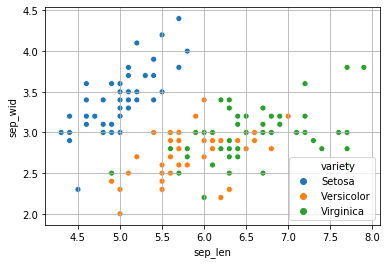

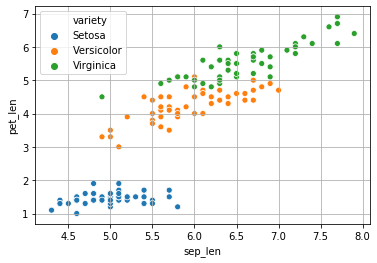

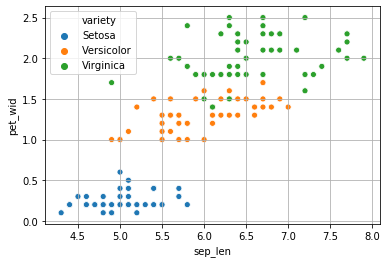

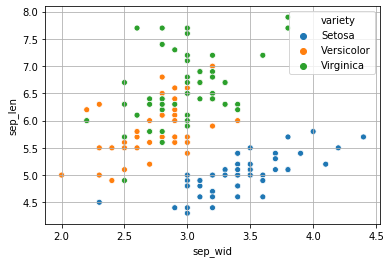

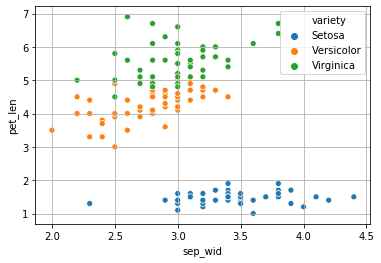

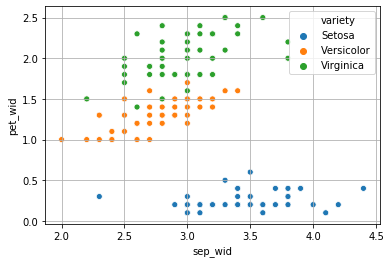

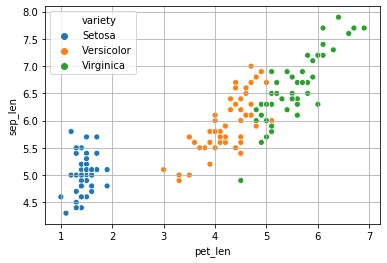

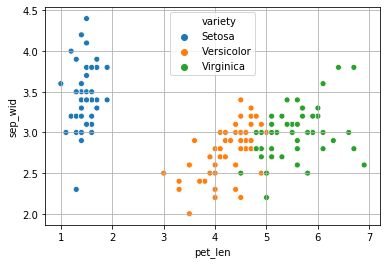

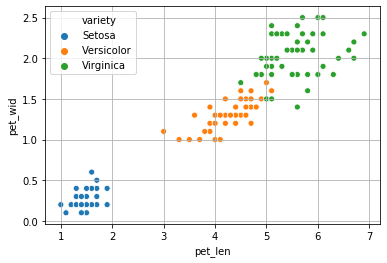

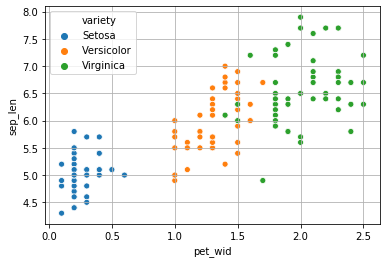

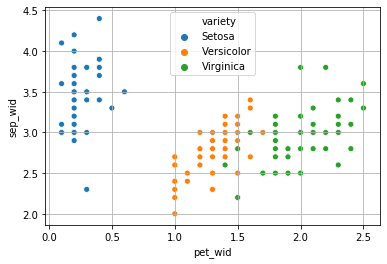

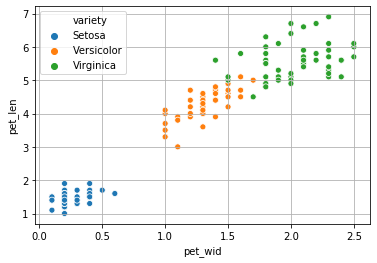

In [55]:
df_dsp = df.toPandas()

d_clr = {'Virginica':'#111111','Setosa':'Green','Versicolor':'Blue'}

for r in df_dsp.columns:
  for c in df_dsp.columns:
    if r == c: continue
    elif r == 'variety' or c=='variety': continue
    
    plt.cla()
    ax = sb.scatterplot(r,c,hue='variety',data=df_dsp)
    # plt.xlabel(r)
    # plt.ylabel(c)
    ax.legend()
    ax.grid(True)

    plt.show()

# Задание 3
Попробуйте отделить какой-нить тип цветка от всех остальных (сформулируйте правило на основе диаграммы - ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА X БОЛЬШЕ/МЕНЬШЕ Y, ТО ЦВЕТОК СКОРЕЕ ВСЕГО ОТНОСИТСЯ/НЕ ОТНОСИТСЯ К ТИПУ Z)<br>
Сделайте отдельную колонку для своего предсказания<br>
Оцените качество (сколько раз Вы угадали с ответом и сколько раз не угадали)

In [115]:
from pyspark.sql import functions as F

# делаем колонку с моими предсказаниями
df_dsp = df.withColumn('variety_my',F.when(df['pet_wid']<1,'Setosa').when(df['pet_wid']<1.8,'Versicolor').otherwise('Virginica'))
df_dsp.sample(False,0.1).show(5)

+-------+-------+-------+-------+-------+----------+
|sep_len|sep_wid|pet_len|pet_wid|variety|variety_my|
+-------+-------+-------+-------+-------+----------+
|    4.6|    3.4|    1.4|    0.3| Setosa|    Setosa|
|    5.4|    3.9|    1.3|    0.4| Setosa|    Setosa|
|    4.5|    2.3|    1.3|    0.3| Setosa|    Setosa|
|    5.1|    3.8|    1.9|    0.4| Setosa|    Setosa|
|    5.3|    3.7|    1.5|    0.2| Setosa|    Setosa|
+-------+-------+-------+-------+-------+----------+
only showing top 5 rows



In [116]:
df_dsp = df_dsp.withColumn('is_error',F.when(df_dsp['variety'] == df_dsp['variety_my'],'угадал').otherwise('не угадал'))
df_dsp = df_dsp.groupBy('variety').pivot('is_error').count()

df_err = df_dsp.toPandas().fillna(0)
print('я угадал {0:.0f} раз и не угадал {1:.0f}'.format(df_err['угадал'].sum(),df_err['не угадал'].sum()))
df_err

я угадал 144 раз и не угадал 6


,variety,не угадал,угадал
0,Virginica,5.0,45
1,Setosa,0.0,50
2,Versicolor,1.0,49
